In [19]:
from pykrige.uk import UniversalKriging
from pykrige.ok import OrdinaryKriging
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("dataset_3.csv", infer_datetime_format=True, parse_dates=True)
data["magnitude"] = data["magnitude"].round(1)
data["date"] = pd.to_datetime(data[["year", "month", "day", "hour", "minute"]])
data = data.sort_values("date")
data = data[data["date"] < "2023-01-01"]
data["time_since_last_earthquake"] = data.date.diff().map(
    lambda x: x.total_seconds() / 86400
)
data

,longitude,latitude,year,month,day,hour,minute,second,magnitude,depth,date,time_since_last_earthquake
21,26.600,40.500,1900,2,7,0,0,0.0,5.0,10.00,1900-02-07 00:00:00,NaN
22,29.260,40.430,1900,6,18,17,40,0.0,5.2,10.00,1900-06-18 17:40:00,131.736111
23,26.300,40.500,1900,7,12,2,5,0.0,4.9,10.00,1900-07-12 02:05:00,23.350694
24,30.100,40.440,1900,8,1,8,40,0.0,5.2,10.00,1900-08-01 08:40:00,20.274306
25,36.400,40.300,1900,8,6,13,25,0.0,5.3,10.00,1900-08-06 13:25:00,5.197917
...,...,...,...,...,...,...,...,...,...,...,...,...
1928,30.946,40.808,2022,12,3,4,59,20.0,4.1,14.20,2022-12-03 04:59:00,0.423611
1929,38.684,39.854,2022,12,10,10,29,26.0,3.6,7.05,2022-12-10 10:29:00,7.229167
1930,27.110,40.364,2022,12,13,3,21,16.0,4.3,12.12,2022-12-13 03:21:00,2.702778
1931,40.537,39.859,2022,12,18,8,57,49.0,3.9,10.21,2022-12-18 08:57:00,5.233333


In [5]:
gridx = np.arange(data['longitude'].min(), data['longitude'].max(), 0.2)
gridy = np.arange(data['latitude'].min(), data['latitude'].max(), 0.2)

In [30]:
ok = OrdinaryKriging(
    data['latitude'], data['longitude'], data['magnitude'], variogram_model="spherical", verbose=True
)
z, ss = ok.execute("grid", gridx, gridy)

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'spherical' Variogram Model
Partial Sill: 0.11564149261132206
Full Sill: 0.44020815508145855
Range: 8.713909508156698
Nugget: 0.3245666624701365 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



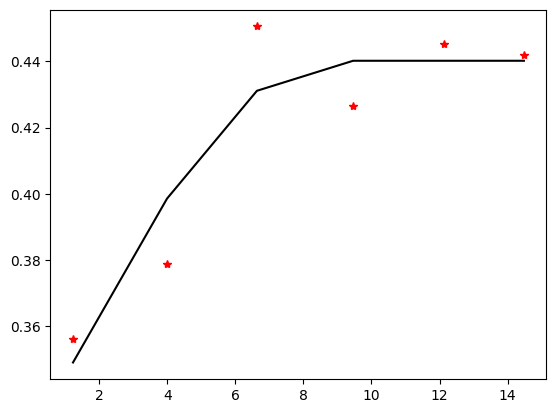

In [31]:
ok.display_variogram_model()

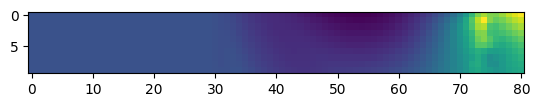

In [32]:
import matplotlib.pyplot as plt
plt.imshow(km)


In [33]:
import pykrige.kriging_tools as kt

In [34]:
kt.write_asc_grid(gridx, gridy, z, filename="output.asc")